<a href="https://colab.research.google.com/github/Soedirman-Machine-Learning/dl-time-series-forecasting/blob/main/Multi_var_edited.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Soedirman-Machine-Learning/dl-time-series-forecasting

Cloning into 'dl-time-series-forecasting'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 148 (delta 69), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (148/148), 2.29 MiB | 9.23 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from pandas import read_csv

df = pd.read_csv('https://raw.githubusercontent.com/Soedirman-Machine-Learning/dl-time-series-forecasting/main/dataset_multivariate.csv')

print(df.shape)
df.tail()

(2394, 8)


,u1,u2,u3,u4,u5,u6,u7,y
2389,0.284859,0.645894,0.688723,0.355109,0.615583,0.608848,0.500866,0.188976
2390,0.266139,0.665503,0.665640,0.354275,0.588834,0.582074,0.508999,0.178992
2391,0.247419,0.665706,0.664740,0.353441,0.561301,0.602186,0.523348,0.169742
2392,0.228699,0.672975,0.677300,0.352607,0.530730,0.636970,0.537697,0.159023
2393,0.215821,0.668945,0.677877,0.351774,0.500161,0.684994,0.569601,0.149922


In [8]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [9]:
# ADF Test on each column
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "u1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.4352
 No. Lags Chosen       = 27
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "u2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.7257
 No. Lags Chosen       = 27
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "u3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

In [10]:
nobs = 479
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)

(1915, 8)
(479, 8)


In [11]:
model = VAR(df_train)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -61.361054246283246
BIC :  -61.152015353292164
FPE :  2.245085980359479e-27
HQIC:  -61.2841287732805 

Lag Order = 2
AIC :  -64.45733780674242
BIC :  -64.06231731335826
FPE :  1.0151623395036793e-28
HQIC:  -64.31196801277522 

Lag Order = 3
AIC :  -64.87284928768918
BIC :  -64.29168766701854
FPE :  6.700152802801926e-29
HQIC:  -64.65897284644241 

Lag Order = 4
AIC :  -64.98698562294848
BIC :  -64.21952312515704
FPE :  5.977542572551731e-29
HQIC:  -64.70454011850428 

Lag Order = 5
AIC :  -65.0292238953119
BIC :  -64.07530054719601
FPE :  5.730464370835889e-29
HQIC:  -64.67814682197445 

Lag Order = 6
AIC :  -65.05234130414102
BIC :  -63.91179690869813
FPE :  5.599720134994799e-29
HQIC:  -64.63257006626083 

Lag Order = 7
AIC :  -65.05243527252212
BIC :  -63.72510940852015
FPE :  5.59948537815597e-29
HQIC:  -64.56390718431979 

Lag Order = 8
AIC :  -65.05108721474751
BIC :  -63.53681923629328
FPE :  5.607426197428617e-29
HQIC:  -64.49373950013722 

Lag Order = 9
AI

In [15]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df_train = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df_train.columns:
        for r in df_train.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df_train.loc[r, c] = min_p_value
    df_train.columns = [var + '_x' for var in variables]
    df_train.index = [var + '_y' for var in variables]
    return df_train

grangers_causation_matrix(df_train, variables = df_train.columns)

,u1_x,u2_x,u3_x,u4_x,u5_x,u6_x,u7_x,y_x
u1_y,1.0,0.0,0.0,0.0066,0.0000,0.0000,0.0000,0.0000
u2_y,0.0,1.0,0.0,0.4691,0.0000,0.0607,0.0167,0.0004
u3_y,0.0,0.0,1.0,0.0000,0.0000,0.0000,0.0000,0.0801
u4_y,0.0,0.0,0.0,1.0000,0.0188,0.0000,0.0001,0.5783
u5_y,0.0,0.0,0.0,0.0026,1.0000,0.0000,0.0000,0.0000
u6_y,0.0,0.0,0.0,0.0001,0.0000,1.0000,0.0000,0.0001
u7_y,0.0,0.0,0.0,0.0000,0.0000,0.0000,1.0000,0.0000
y_y,0.0,0.0,0.0,0.0156,0.0000,0.0000,0.0000,1.0000


In [16]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_train)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
u1     ::  474.07    > 143.6691  =>   True
u2     ::  311.4     > 111.7797  =>   True
u3     ::  206.75    > 83.9383   =>   True
u4     ::  135.43    > 60.0627   =>   True
u5     ::  83.39     > 40.1749   =>   True
u6     ::  38.68     > 24.2761   =>   True
u7     ::  3.7       > 12.3212   =>   False
y      ::  0.16      > 4.1296    =>   False


In [17]:
model = VAR(df_train)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -61.361054246283246
BIC :  -61.152015353292164
FPE :  2.245085980359479e-27
HQIC:  -61.2841287732805 

Lag Order = 2
AIC :  -64.45733780674242
BIC :  -64.06231731335826
FPE :  1.0151623395036793e-28
HQIC:  -64.31196801277522 

Lag Order = 3
AIC :  -64.87284928768918
BIC :  -64.29168766701854
FPE :  6.700152802801926e-29
HQIC:  -64.65897284644241 

Lag Order = 4
AIC :  -64.98698562294848
BIC :  -64.21952312515704
FPE :  5.977542572551731e-29
HQIC:  -64.70454011850428 

Lag Order = 5
AIC :  -65.0292238953119
BIC :  -64.07530054719601
FPE :  5.730464370835889e-29
HQIC:  -64.67814682197445 

Lag Order = 6
AIC :  -65.05234130414102
BIC :  -63.91179690869813
FPE :  5.599720134994799e-29
HQIC:  -64.63257006626083 

Lag Order = 7
AIC :  -65.05243527252212
BIC :  -63.72510940852015
FPE :  5.59948537815597e-29
HQIC:  -64.56390718431979 

Lag Order = 8
AIC :  -65.05108721474751
BIC :  -63.53681923629328
FPE :  5.607426197428617e-29
HQIC:  -64.49373950013722 

Lag Order = 9
AI

In [18]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-39.19,-39.17,9.549e-18,-39.18
1,-61.33,-61.12,2.319e-27,-61.25
2,-64.43,-64.03,1.046e-28,-64.28
3,-64.85,-64.26*,6.877e-29,-64.63
4,-64.96,-64.19,6.113e-29,-64.68*
5,-65.01,-64.05,5.845e-29,-64.66
6,-65.04,-63.89,5.697e-29,-64.61
7,-65.04,-63.71,5.680e-29,-64.55
8,-65.04,-63.52,5.685e-29,-64.48
9,-65.05,-63.35,5.590e-29,-64.43


In [19]:
model_fitted = model.fit(5)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 02, Feb, 2022
Time:                     05:42:58
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -64.0753
Nobs:                     1910.00    HQIC:                  -64.6781
Log likelihood:           40749.5    FPE:                5.73046e-29
AIC:                     -65.0292    Det(Omega_mle):     4.83502e-29
--------------------------------------------------------------------
Results for equation u1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.008943         0.006859            1.304           0.192
L1.u1         1.423549         0.024526           58.043           0.000
L1.u2         0.050264         0.013323            3.773           0.000
L1.u3        -0.054707

In [20]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print((col), ':', round(val, 2))

u1 : 2.0
u2 : 2.01
u3 : 2.0
u4 : 2.0
u5 : 2.01
u6 : 2.01
u7 : 2.02
y : 2.02


In [21]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 2

# Input data for forecasting
forecast_input = df_train.values[-lag_order:]
forecast_input

5


array([[0.21121225, 0.69174651, 0.62373156, 0.3608519 , 0.64632401,
        0.47156315, 0.42516628, 0.32117267],
       [0.2207292 , 0.68802584, 0.61617889, 0.36082759, 0.63440255,
        0.47455049, 0.42516628, 0.31250043],
       [0.23024615, 0.73054225, 0.61558304, 0.360803  , 0.65576024,
        0.50924839, 0.45308638, 0.30470063],
       [0.23976374, 0.71225438, 0.61882933, 0.36077869, 0.65910366,
        0.51916968, 0.47692938, 0.29332157],
       [0.2492807 , 0.72077919, 0.63372596, 0.36075437, 0.66431068,
        0.55463437, 0.49966675, 0.28105612]])

In [22]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_pred')
df_forecast

,u1_pred,u2_pred,u3_pred,u4_pred,u5_pred,u6_pred,u7_pred,y_pred
1915,0.261061,0.715310,0.649986,0.363523,0.671271,0.553989,0.509097,0.270465
1916,0.271338,0.710364,0.661956,0.372882,0.675004,0.550400,0.506525,0.261128
1917,0.276457,0.704984,0.672480,0.378898,0.674521,0.545821,0.500950,0.253259
1918,0.279466,0.702795,0.676996,0.384430,0.671209,0.541280,0.497531,0.246715
1919,0.280622,0.701870,0.680605,0.388843,0.667470,0.538868,0.493893,0.241431
...,...,...,...,...,...,...,...,...
2389,0.279301,0.666070,0.634568,0.444893,0.663385,0.598268,0.566724,0.260297
2390,0.279289,0.666069,0.634531,0.444909,0.663400,0.598311,0.566770,0.260297
2391,0.279278,0.666069,0.634495,0.444924,0.663415,0.598355,0.566817,0.260297
2392,0.279267,0.666068,0.634460,0.444940,0.663430,0.598398,0.566863,0.260297


In [26]:
y_predictions = df_forecast['y_pred']
y_aktual = df_test['y']


Text(0.5, 1.0, 'nilai y')

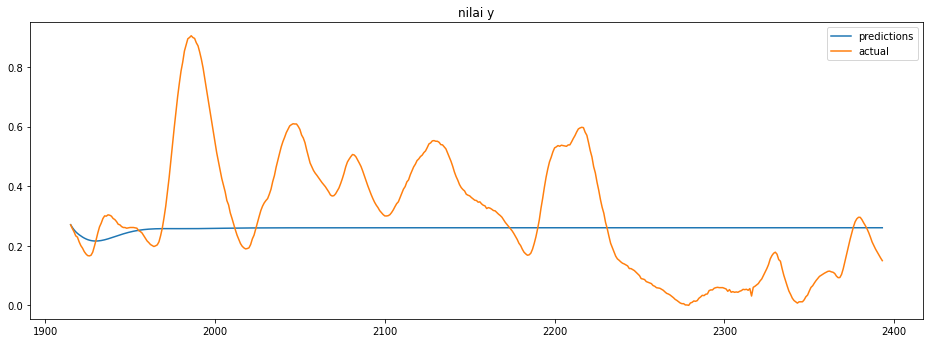

In [27]:
from matplotlib.pyplot import figure
plt.figure(1)
plt.subplot(211)
y_predictions.plot(figsize = (16,12), label ="predictions")
y_aktual.plot(figsize = (16,12), label = "actual")
plt.legend(fontsize=10)
plt.title('nilai y')

In [28]:
df_forecast.loc[:, ['y_pred']]

,y_pred
1915,0.270465
1916,0.261128
1917,0.253259
1918,0.246715
1919,0.241431
...,...
2389,0.260297
2390,0.260297
2391,0.260297
2392,0.260297
